# Classification
- Churn prediction of a Customer telecomm industry

## 1. Importing libaries

In [133]:
import numpy as np
import pandas as pd
from collections import namedtuple
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, precision_recall_curve

## 2. Importing data and inspection

In [3]:
df = pd.read_csv("../docs/Customer_telecom.csv")

In [4]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [5]:
df.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,"""415""",382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,"""415""",371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,"""415""",358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,"""408""",375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,"""415""",330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   object 
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [7]:
df.describe()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## 3. ML-based classification

In [122]:
#. Auxillary function 
def return_model_evaluation(model, X_test, y_test):
    """Returns model precision, recall, accuracy, f1 score for classifier """
    # Predicting
    y_pred = model.predict(X_test)
    
    # Model evaluation metrics
    recall = round(recall_score(y_test, y_pred), 3)
    precision = round(precision_score(y_test, y_pred), 3)
    accuracy = round(accuracy_score(y_test, y_pred), 3)
    f1_sc = round(f1_score(y_test, y_pred), 3)
    
    # Precision-recall curves
    p, r, thresholds  = precision_recall_curve(y_test, model.predict_proba(X_test).T[1])
    
    # Storing the results as named tuple
    results = namedtuple('evaluation', ['precision', 
                                        'recall',
                                        'accuracy',
                                        'f1_score',
                                        'prc_precision',
                                        'prc_recall',
                                        'prc_threshold'])
    return results(recall, precision, accuracy, f1_sc, p, r, thresholds) 
    

### 3.1 Logistic regression

In [131]:
# Preprocessing
features_to_use = ['total intl minutes', 'total eve minutes', 'total day minutes',
                   'total intl calls', 'total eve calls', 'total day calls',
                  'state', 'number vmail messages', 'international plan', 'voice mail plan', 
                  'customer service calls', 'account length']

X = df[features_to_use]
y = df['churn']

# One-hot encoding using ColumnTransformer
transformer_name = 'ohe_on_all_categorical_features'
columns_to_encode = ['state', 
                     'international plan', 
                     'voice mail plan']

ohe_final = ColumnTransformer([
    (transformer_name, OneHotEncoder(sparse=False), columns_to_encode)], 
    remainder='passthrough')

# Fitting and predicting
# Creating test-train split using Stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=30, stratify=y)
lr_pipe = Pipeline([('ohe', ohe_final),
                    ('scaler', StandardScaler()),
                    ('lr', LogisticRegression())])

lr_gs = GridSearchCV(estimator=lr_pipe,
                     cv=5,
                     param_grid={'lr__C': np.logspace(-1,1,5)},
                     n_jobs=2)
lr_gs.fit(X_train, y_train)

# Evaluating
evaluated_metrics = return_model_evaluation(model=lr_gs.best_estimator_, 
                                          X_test=X_test,
                                          y_test=y_test)

Text(0.5, 1.0, 'Precision vs. Recall')

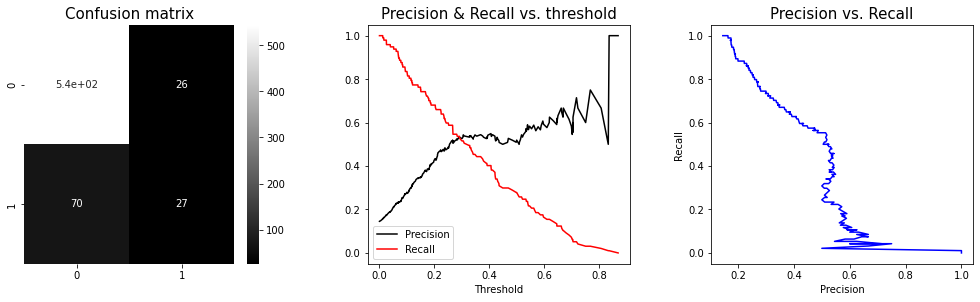

In [132]:
# Plotting results
fig, ax = plt.subplots(1, 3, figsize=(15,5))
fig.tight_layout(pad=5)
ax=ax.ravel()

# Confusion matrix
ax[0] = sns.heatmap(confusion_matrix(y_test, lr_gs.best_estimator_.predict(X_test)), 
                    annot=True,
                    cmap='gray',
                    ax=ax[0])
ax[0].set_title('Confusion matrix', fontsize=15)

# Precision & recall vs. threshold
ax[1].plot(evaluated_metrics.prc_threshold, evaluated_metrics.prc_precision[1:], color='k', label='Precision')
ax[1].plot(evaluated_metrics.prc_threshold, evaluated_metrics.prc_recall[1:], color='r', label='Recall')
ax[1].set_title('Precision & Recall vs. threshold', fontsize=15)
ax[1].set_xlabel('Threshold', fontsize=10)
ax[1].legend()

# Precision-recall curves
ax[2].plot(evaluated_metrics.prc_precision, evalated_metrics.prc_recall, color='b')
ax[2].set_xlabel('Precision', fontsize=10)
ax[2].set_ylabel('Recall', fontsize=10)
ax[2].set_title('Precision vs. Recall', fontsize=15)

### 3.2 RandomForest Classifier

In [138]:
rf_pipe = Pipeline([('ohe', ohe_final),
                    ('scaler', StandardScaler()),
                    ('rf', RandomForestClassifier(random_state=42))])

rf_gs = GridSearchCV(estimator=rf_pipe,
                     cv=5,
                     param_grid={'rf__n_estimators': [10, 50, 100], 
                                 'rf__max_depth': [3, 10, 30]},
                     n_jobs=2)
rf_gs.fit(X_train, y_train)

# Evaluating
rf_evaluated_metrics = return_model_evaluation(model=rf_gs.best_estimator_, 
                                               X_test=X_test,
                                               y_test=y_test)

Text(0.5, 1.0, 'Precision vs. Recall')

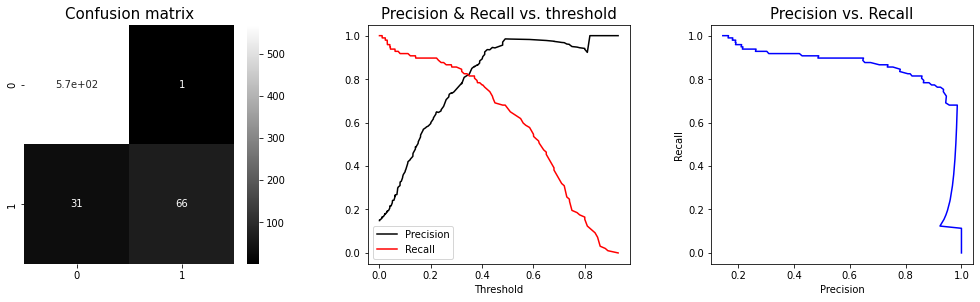

In [140]:
# Plotting results
fig, ax = plt.subplots(1, 3, figsize=(15,5))
fig.tight_layout(pad=5)
ax=ax.ravel()

# Confusion matrix
ax[0] = sns.heatmap(confusion_matrix(y_test, rf_gs.best_estimator_.predict(X_test)), 
                    annot=True,
                    cmap='gray',
                    ax=ax[0])
ax[0].set_title('Confusion matrix', fontsize=15)

# Precision & recall vs. threshold
ax[1].plot(rf_evaluated_metrics.prc_threshold, rf_evaluated_metrics.prc_precision[1:], color='k', label='Precision')
ax[1].plot(rf_evaluated_metrics.prc_threshold, rf_evaluated_metrics.prc_recall[1:], color='r', label='Recall')
ax[1].set_title('Precision & Recall vs. threshold', fontsize=15)
ax[1].set_xlabel('Threshold', fontsize=10)
ax[1].legend()

# Precision-recall curves
ax[2].plot(rf_evaluated_metrics.prc_precision, rf_evaluated_metrics.prc_recall, color='b')
ax[2].set_xlabel('Precision', fontsize=10)
ax[2].set_ylabel('Recall', fontsize=10)
ax[2].set_title('Precision vs. Recall', fontsize=15)

### 3.3 Model Comparison

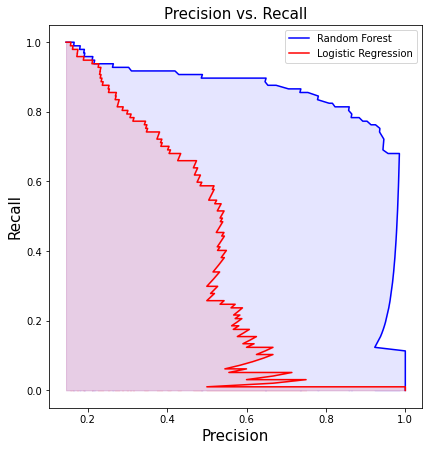

In [147]:
# Comparing precision recall curves of the models
fig, ax = plt.subplots(1,1,figsize=(7,7))
fig.tight_layout(pad=5)

ax.plot(rf_evaluated_metrics.prc_precision, rf_evaluated_metrics.prc_recall, color='b', label='Random Forest')
ax.fill_between(rf_evaluated_metrics.prc_precision, rf_evaluated_metrics.prc_recall, alpha=0.1, color='b') 
ax.plot(evaluated_metrics.prc_precision, evaluated_metrics.prc_recall, color='r', label='Logistic Regression')
ax.fill_between(evaluated_metrics.prc_precision, evaluated_metrics.prc_recall, alpha=0.1, color='r') 
ax.set_xlabel('Precision', fontsize=15)
ax.set_ylabel('Recall', fontsize=15)
ax.set_title('Precision vs. Recall', fontsize=15)
ax.legend()